In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
%load_ext nb_black


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
class GraphConvolution(tf.keras.layers.Layer):
    def __init__(self, output_dim):
        super(GraphConvolution, self).__init__()
        self.output_dim = output_dim

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[input_shape[1], self.output_dim])

    def call(self, inputs, adjacency_matrix):
        adjacency_matrix = tf.cast(adjacency_matrix, tf.float32)
        output = tf.matmul(adjacency_matrix, inputs)
        output = tf.matmul(output, self.kernel)
        return tf.nn.relu(output)

class GraphConvolutionalNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gcn1 = GraphConvolution(64)
        self.gcn2 = GraphConvolution(num_classes)

    def call(self, inputs, adjacency_matrix):
        x = self.gcn1(inputs, adjacency_matrix)
        x = self.gcn2(x, adjacency_matrix)
        return x

In [ ]:
# Example usage
# Generate a random adjacency matrix and feature matrix
adjacency_matrix = np.random.rand(100, 100)
feature_matrix = np.random.rand(100, 32)

# Create the GCN model
model = GraphConvolutionalNetwork(num_classes=10)

# Convert the inputs to TensorFlow tensors
adjacency_matrix = tf.convert_to_tensor(adjacency_matrix)
feature_matrix = tf.convert_to_tensor(feature_matrix)

# Perform a forward pass
output = model(feature_matrix, adjacency_matrix)

# Print the output shape
print("Output shape:", output.shape)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

class GraphConvolution(tf.keras.layers.Layer):
    def __init__(self, output_dim):
        super(GraphConvolution, self).__init__()
        self.output_dim = output_dim

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[input_shape[1], self.output_dim])

    def call(self, inputs, adjacency_matrix):
        adjacency_matrix = tf.cast(adjacency_matrix, tf.float32)
        output = tf.matmul(adjacency_matrix, inputs)
        output = tf.matmul(output, self.kernel)
        return tf.nn.relu(output)

class GraphConvolutionalNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(GraphConvolutionalNetwork, self).__init__()
        self.gcn1 = GraphConvolution(64)
        self.gcn2 = GraphConvolution(num_classes)

    def call(self, inputs, adjacency_matrix):
        x = self.gcn1(inputs, adjacency_matrix)
        x = self.gcn2(x, adjacency_matrix)
        return x

# Load the Cora dataset
dataset = tfds.load("cora", split=tfds.Split.TRAIN)
data = next(iter(dataset))

# Extract the feature matrix and adjacency matrix from the dataset
feature_matrix = data['features']
adjacency_matrix = data['adjacency']

# Normalize the feature matrix
feature_matrix = tf.keras.utils.normalize(feature_matrix)

# Convert the adjacency matrix to a dense tensor
adjacency_matrix = tf.sparse.to_dense(adjacency_matrix)

# Create the GCN model
model = GraphConvolutionalNetwork(num_classes=7)

# Convert the inputs to TensorFlow tensors
adjacency_matrix = tf.convert_to_tensor(adjacency_matrix)
feature_matrix = tf.convert_to_tensor(feature_matrix)

# Perform a forward pass
output = model(feature_matrix, adjacency_matrix)

# Print the output shape
print("Output shape:", output.shape)

# Split the dataset into training and testing sets
train_dataset = dataset.take(140)
test_dataset = dataset.skip(140)

# Create a training loop
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

@tf.function
def train_step(features, adjacency, labels):
    with tf.GradientTape() as tape:
        predictions = model(features, adjacency)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

num_epochs = 10
batch_size = 32

for epoch in range(num_epochs):
    epoch_loss = 0.0
    num_batches = 0

    for batch in train_dataset.batch(batch_size):
        features = batch['features']
        adjacency = tf.sparse.to_dense(batch['adjacency'])
        labels = batch['label']

        loss = train_step(features, adjacency, labels)
        epoch_loss += loss
        num_batches += 1

    average_loss = epoch_loss / num_batches
    print("Epoch {}: Loss = {:.4f}".format(epoch+1, average_loss))

# Evaluation
test_features = tf.convert_to_tensor(next(iter(test_dataset.batch(100)))['features'])
test_adjacency = tf.convert_to_tensor(tf.sparse.to_dense(next(iter(test_dataset.batch(100)))['adjacency']))
test_labels = next(iter(test_dataset.batch(100)))['label']

test_predictions = model(test_features, test_adjacency)
test_predictions = tf.argmax(test_predictions, axis=1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(test_labels, test_predictions), tf.float32))

print("Test Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
import tensorflow_datasets as tfds

datasets = tfds.list_builders()
print(datasets)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft

In [ ]:
# Sample DataFrame
df = pd.DataFrame({
    'hit': [1, 2, 3, 4, 5],
    'samples': [[1, 2, 3, 4, 5],
                [2, 4, 6, 8, 10],
                [3, 6, 9, 12, 15],
                [4, 8, 12, 16, 20],
                [5, 10, 15, 20, 25]]
})

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['hit'], np.zeros(len(df)), c='blue', s=50)

# Select points
selected_points = []

In [ ]:
def on_pick(event):
    ind = event.ind[0]
    x = df['hit'][ind]
    y = df['samples'][ind]

    # Plot signal
    plt.figure(figsize=(8, 6))
    plt.plot(y)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Signal for Hit {x}')
    plt.show()

    # Plot FFT
    fft_y = fft(y)
    fft_freq = np.fft.fftfreq(len(y))
    plt.figure(figsize=(8, 6))
    plt.plot(fft_freq, np.abs(fft_y))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title(f'FFT for Hit {x}')
    plt.show()

In [ ]:
scatter.set_picker(5)  # Set the picking radius to 5 points

def update_plot():
    # Update scatter plot
    scatter.set_offsets(np.c_[df['hit'], np.zeros(len(df))])

    # Update event handler
    scatter.figure.canvas.mpl_connect('pick_event', on_pick)

    # Redraw the plot
    plt.draw()

update_plot()

plt.xlabel('Hit')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import numpy as np

In [8]:
def read_graph_from_txt(file_path):
    nodes = set()
    edges = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the header lines starting with '#'
        for line in lines:
            if not line.startswith('#'):
                break
        
        # Read the edges
        for line in lines:
            if not line.startswith('#'):
                from_node, to_node = map(int, line.strip().split())
                nodes.add(from_node)
                nodes.add(to_node)
                edges.append((from_node, to_node))
    
    return nodes, edges



In [9]:
# Replace 'aa.txt' with the actual path to your file
nodes, edges = read_graph_from_txt('aa.txt')


In [10]:

# Example: Print the number of nodes and edges
print("Number of Nodes:", len(nodes))
print("Number of Edges:", len(edges))

Number of Nodes: 1352
Number of Edges: 1996


In [11]:
def plot_graph(nodes, edges):
    G = nx.DiGraph()  # Create a directed graph
    
    # Add nodes to the graph
    G.add_nodes_from(nodes)
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Plot the graph
    pos = nx.spring_layout(G, seed=42)  # Positions for the nodes
    nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray', arrowsize=5)
    
    # Show the plot
    plt.show()

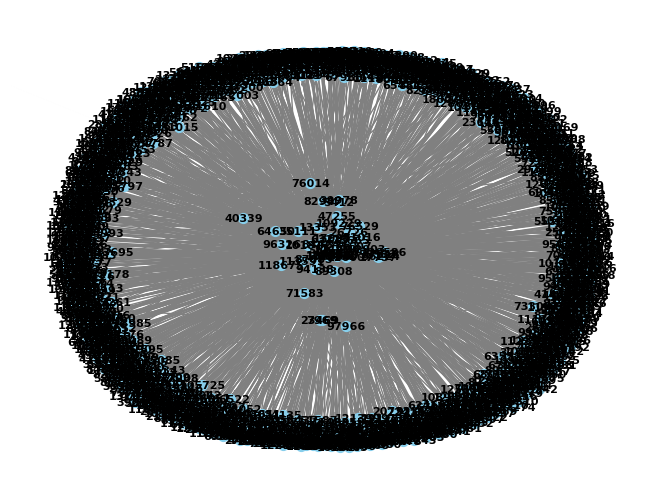

In [12]:
plot_graph(nodes, edges)

In [13]:
def plot_graph_with_plotly(nodes, edges):
    G = nx.DiGraph()  # Create a directed graph
    
    # Add nodes to the graph
    G.add_nodes_from(nodes)
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Get positions for the nodes using the Kamada-Kaway layout
    pos = nx.kamada_kawai_layout(G)
    
    # Create edge traces
    edge_trace = go.Scatter(
        x=[pos[e[0]][0] for e in edges],
        y=[pos[e[0]][1] for e in edges],
        line=dict(width=0.5, color='gray'),
        hoverinfo='none',
        mode='lines'
    )
    
    # Create node traces
    node_trace = go.Scatter(
        x=[pos[node][0] for node in nodes],
        y=[pos[node][1] for node in nodes],
        text=[str(node) for node in nodes],
        mode='markers+text',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            colorscale='YlGnBu',
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=2)
        )
    )
    
    # Create figure and layout
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        title="Directed Graph",
                        titlefont_size=16,
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False),
                        margin=dict(b=0, l=0, r=0, t=50)
                    )
                   )
    
    # Show the plot
    fig.show()



In [14]:
plot_graph_with_plotly(nodes, edges)

KeyboardInterrupt: 

In [15]:
G = nx.DiGraph()  # Create a directed graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [16]:
# Basic Graph Properties
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Is Strongly Connected:", nx.is_strongly_connected(G))
print("Is Weakly Connected:", nx.is_weakly_connected(G))
print("Average In-degree:", sum(dict(G.in_degree()).values()) / G.number_of_nodes())
print("Average Out-degree:", sum(dict(G.out_degree()).values()) / G.number_of_nodes())


Number of Nodes: 1352
Number of Edges: 1996
Is Strongly Connected: False
Is Weakly Connected: False
Average In-degree: 1.4763313609467457
Average Out-degree: 1.4763313609467457


In [17]:
# Degree Distribution
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
print("Node with Highest In-degree:", max(in_degrees, key=in_degrees.get))
print("Node with Highest Out-degree:", max(out_degrees, key=out_degrees.get))


Node with Highest In-degree: 115607
Node with Highest Out-degree: 106274


In [22]:
def load_sample_graph():
    # Create a Watts-Strogatz small-world graph
    num_nodes = 500
    avg_degree = 10
    rewiring_prob = 0.1
    G = nx.watts_strogatz_graph(num_nodes, avg_degree, rewiring_prob)
    
    return G

In [23]:
# Load the sample graph
G = load_sample_graph()

In [24]:
# Basic Graph Properties
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())

Number of Nodes: 500
Number of Edges: 2500


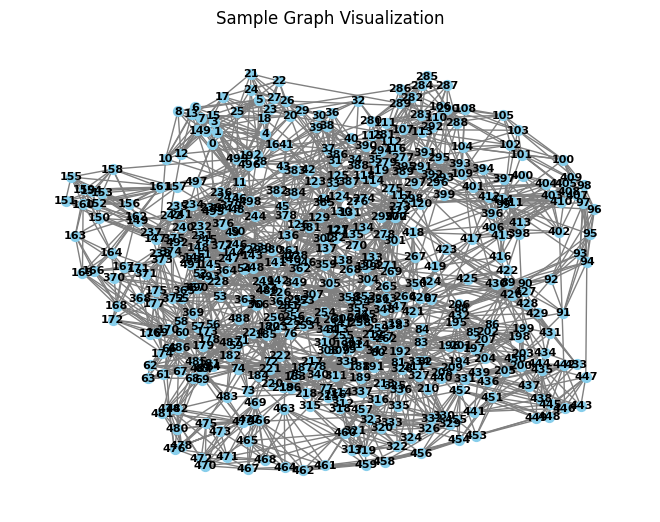

In [25]:
# Network Visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray', arrowsize=5)
plt.title("Sample Graph Visualization")
plt.show()

In [26]:
# Basic Graph Properties
print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Is Connected:", nx.is_connected(G))  # Check if the graph is connected

Number of Nodes: 500
Number of Edges: 2500
Is Connected: True


In [27]:
# Degree Distribution
degrees = dict(G.degree())
degree_values = list(degrees.values())
print("Average Degree:", sum(degree_values) / len(degree_values))

Average Degree: 10.0


In [28]:
# Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [29]:
# Print the top 5 nodes with highest degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 Nodes with Highest Degree Centrality:")
for node, centrality in sorted_degree_centrality[:5]:
    print(f"Node: {node}, Degree Centrality: {centrality:.3f}")

Top 5 Nodes with Highest Degree Centrality:
Node: 236, Degree Centrality: 0.026
Node: 261, Degree Centrality: 0.026
Node: 353, Degree Centrality: 0.026
Node: 395, Degree Centrality: 0.026
Node: 11, Degree Centrality: 0.024


In [30]:
# Assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity:", assortativity)

Degree Assortativity: 0.00246300354853273


In [31]:
# Community Detection
communities = nx.algorithms.community.greedy_modularity_communities(G)
print("Number of Communities:", len(communities))
for i, comm in enumerate(communities, 1):
    print(f"Community {i}: {comm}")

Number of Communities: 5
Community 1: frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141})
Community 2: frozenset({358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 4

In [32]:
# Connectivity Analysis
if nx.is_connected(G):
    print("The graph is connected.")
else:
    components = nx.connected_components(G)
    num_components = nx.number_connected_components(G)
    print(f"The graph has {num_components} connected components.")
    largest_component = max(components, key=len)
    print(f"The largest connected component has {len(largest_component)} nodes.")


The graph is connected.


In [44]:
# Path Analysis
source_node = 0
target_node = 333

shortest_path = nx.shortest_path(G, source=source_node, target=target_node)
shortest_path_length = nx.shortest_path_length(G, source=source_node, target=target_node)
print(f"Shortest Path from Node {source_node} to Node {target_node}: {shortest_path}")
print(f"Shortest Path Length: {shortest_path_length}")

Shortest Path from Node 0 to Node 333: [0, 2, 304, 299, 334, 333]
Shortest Path Length: 5


In [45]:
# Density and Transitivity
density = nx.density(G)
transitivity = nx.transitivity(G)
print(f"Graph Density: {density:.3f}")
print(f"Graph Transitivity: {transitivity:.3f}")

Graph Density: 0.020
Graph Transitivity: 0.476


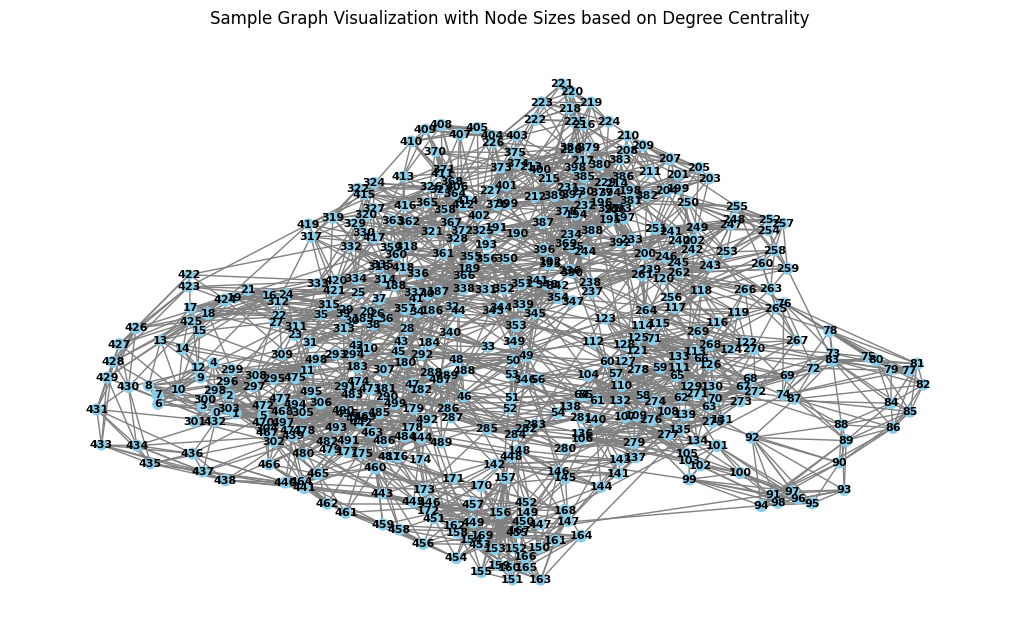

In [46]:
# Network Visualization with Node Sizes Based on Degree Centrality
degree_centrality = nx.degree_centrality(G)
node_sizes = [3000 * degree_centrality[node] for node in G.nodes()]

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray', arrowsize=5)
plt.title("Sample Graph Visualization with Node Sizes based on Degree Centrality")
plt.show()

In [47]:
# Community Detection and Visualization
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Create a dictionary with community IDs as keys and corresponding nodes as values
community_dict = {i: list(community) for i, community in enumerate(communities)}

# Create a new graph with nodes colored according to their communities
community_graph = nx.Graph()
for comm_id, nodes in community_dict.items():
    community_graph.add_nodes_from(nodes, community=comm_id)
    community_graph.add_edges_from(G.edges(nbunch=nodes))

# Get positions for nodes with the same community color together
pos_communities = nx.spring_layout(community_graph, seed=42)


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 142.

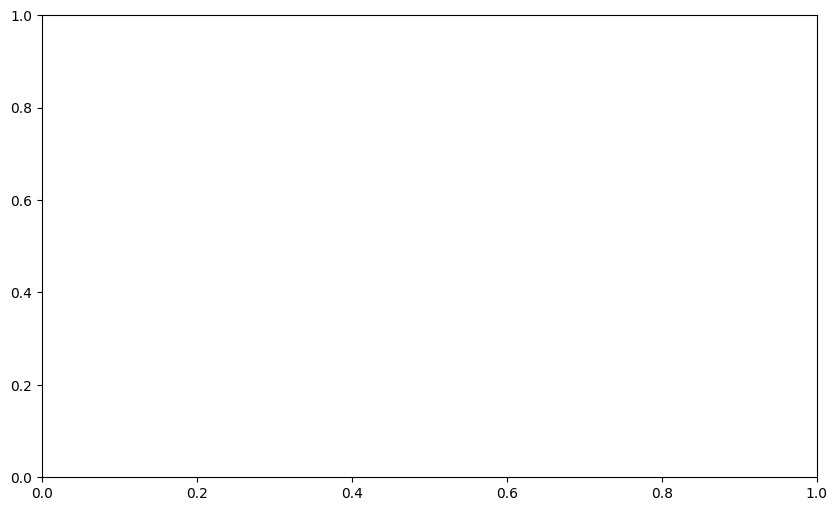

In [50]:
# Extract community colors
community_colors = np.linspace(0, 1, len(communities))

plt.figure(figsize=(10, 6))
for comm_id, nodes in community_dict.items():
    nx.draw_networkx_nodes(community_graph, pos_communities, nodelist=nodes, node_color=[community_colors[comm_id]], node_size=100, cmap=plt.cm.jet, vmin=0, vmax=1)

nx.draw_networkx_labels(community_graph, pos_communities, font_size=8, font_weight='bold')
nx.draw_networkx_edges(community_graph, pos_communities, edge_color='gray', alpha=0.5)

plt.title("Sample Graph with Nodes Colored by Communities")
plt.show()